In [104]:
import numpy as np
import sys
import os
from matplotlib import pyplot as plt
from sklearn.metrics import (recall_score, accuracy_score, precision_score,f1_score,
                             roc_auc_score, average_precision_score,make_scorer, 
                             confusion_matrix, fbeta_score, roc_curve,
                             matthews_corrcoef)

from matplotlib import rc
rc('font',**{'family':'serif','serif':['Palatino'],'size':16})
rc('text', usetex=True)


## Generation of validation data (deleting pixels used as training data)

In [105]:
def get_metric_array(labels_dir, prob_dir, true_label, n_seeds):
    print()
    try:
        labels = np.load(labels_dir)
        print(labels.shape)
        y_prob = np.load(prob_dir)
        print(y_prob.shape)
        cm = confusion_matrix(true_label, labels)
        cm_n = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    except:
        labels = None
        y_prob = None
        cm = None
        exc_type, exc_value, exc_traceback = sys.exc_info()
        print("Error:", exc_value)
        return None
    
    if labels is not None:
        f1 = f1_score(true_label,labels)
        acc = accuracy_score(true_label,labels)
        prec = precision_score(true_label,labels)
        tn_n = cm_n[0,0]
        tp_n = cm_n[1,1]
        fp_n = cm_n[0,1]
        fn_n = cm_n[1,0]
        prec_n = tp_n/(tp_n + fp_n)
        rec = recall_score(true_label,labels)
        roc = roc_auc_score(true_label,labels)
        fpr, tpr, thresholds = roc_curve(true_label, y_prob, pos_label=1)
        prec_rec= average_precision_score(true_label,y_prob)
        f2= fbeta_score(true_label,labels,beta=2)
        roc_prob = roc_auc_score(true_label,y_prob)

        tn=cm[0,0]
        fp=cm[0,1]
        fn=cm[1,0]
        tp=cm[1,1]
        tot=cm.sum()
        spec = tn/(tn+fp)
        fallout = fp/(fp+tn)
        fnr = fn/(fn+fp)
        gce = 1/tot*np.min([fn*(fn+2*tp)/(tp+fn) + fp*(fp+2*tn)/(tn+fp) , fp*(fp+2*tp)/(tp+fp) + fn*(fn + 2*tn)/(tn+fn)])

    return {"f1":f1, "acc":acc, "prec":prec, "rec":rec, "roc":roc, "spec": spec,"prec_n":prec_n,
           "prec_rec": prec_rec, "fallout":fallout, "fnr":fnr,"f2":f2, "gce":gce, "roc_prob":roc_prob,
           "fpr": fpr, "tpr":tpr }


In [107]:
base_dir = "/home/rpezoa/experiment_data/"
output_dir = base_dir + "output/probability/2+_1/f1/f1_13005_pix/"
images = ["1+_20", "1+_25", "2+_1", "2+_8", "2+_9", "3+_19"]
seeds = [0,1,2,3,4,5,6,7,8,9]
n_seeds = len(seeds)
n_images = len(images)
images_dir = [None] * n_images 
big_target_vector_path = [None] * n_images
perc = "0.05"
for i,im in enumerate(images):
    print(":::: Image :", im, "::::")
    if not os.path.exists(output_dir + im + "/40_random_pix_"+perc+"_percentage/random/val_big_pred"):
        os.makedirs(output_dir + im + "/40_random_pix_"+perc+"_percentage/random/val_big_pred")
    if not os.path.exists(output_dir + im + "/40_random_pix_"+perc+"_percentage/random/val_labels"):
        os.makedirs(output_dir + im + "/40_random_pix_"+perc+"_percentage/random/val_labels")
    if not os.path.exists(output_dir + im + "/40_random_pix_"+perc+"_percentage/random/val_big_prob"):
        os.makedirs(output_dir + im + "/40_random_pix_"+perc+"_percentage/random/val_big_prob")
    
    target_vector = np.load(output_dir + im + "/40_random_pix_"+perc+"_percentage/random/labels.npy")
    #print("target_vector.shape", target_vector.shape)
    for j,seed in enumerate(seeds): 
        feat_vector = np.load(output_dir + im + "/40_random_pix_"+perc+"_percentage/random/big_pred/13005_size_" + str(seed) + "_seed_big_pred.npy")
        prob_vector = np.load(output_dir + im + "/40_random_pix_"+perc+"_percentage/random/big_prob/13005_size_" + str(seed) + "_seed_big_prob.npy")[:,1]
        #print("feat_vector.shape", feat_vector.shape)
        idx_0 = np.load(output_dir + im + "/40_random_pix_"+perc+"_percentage/random/random_pix_idx/13005_size_" + str(seed) + "_seed_idx_0.npy")
        idx_1 = np.load(output_dir + im + "/40_random_pix_"+perc+"_percentage/random/random_pix_idx/13005_size_" + str(seed) + "_seed_idx_1.npy")
        idxs = np.concatenate((idx_0, idx_1),axis=0)
        validation_feat_vec = np.delete(feat_vector,idxs)
        validation_prob = np.delete(prob_vector,idxs)
        print("validation_feat_vec.shape", validation_feat_vec.shape)
        validation_target_vec = np.delete(target_vector,idxs)
        print("validation_target_vec.shape", validation_target_vec.shape)
        check_vector=np.load(output_dir + im + "/40_random_pix_"+perc+"_percentage/random/feat_vectors_check/13005_size_" + str(seed) + "_seed_pixels.npy")
        train_vector=np.load(output_dir + im + "/40_random_pix_"+perc+"_percentage/random/feat_vectors/13005_size_" + str(seed) + "_seed_pixels.npy")
        if check_vector.all()==train_vector.all():
            np.save(output_dir + im + "/40_random_pix_"+perc+"_percentage/random/val_big_pred/"+str(j)+".npy",validation_feat_vec)
            np.save(output_dir + im + "/40_random_pix_"+perc+"_percentage/random/val_big_prob/"+str(j)+".npy",validation_prob)
            np.save(output_dir + im + "/40_random_pix_"+perc+"_percentage/random/val_labels/"+str(j)+".npy", validation_target_vec)
        else:
            print("There is a problem in seed ", j, "!!!")
    print("\n")



:::: Image : 1+_20 ::::
validation_feat_vec.shape (987005,)
validation_target_vec.shape (987005,)
validation_feat_vec.shape (987000,)
validation_target_vec.shape (987000,)
validation_feat_vec.shape (987006,)
validation_target_vec.shape (987006,)
validation_feat_vec.shape (986999,)
validation_target_vec.shape (986999,)
validation_feat_vec.shape (986997,)
validation_target_vec.shape (986997,)
validation_feat_vec.shape (987002,)
validation_target_vec.shape (987002,)
validation_feat_vec.shape (987002,)
validation_target_vec.shape (987002,)
validation_feat_vec.shape (987002,)
validation_target_vec.shape (987002,)
validation_feat_vec.shape (987011,)
validation_target_vec.shape (987011,)
validation_feat_vec.shape (987002,)
validation_target_vec.shape (987002,)


:::: Image : 1+_25 ::::
validation_feat_vec.shape (987008,)
validation_target_vec.shape (987008,)
validation_feat_vec.shape (987000,)
validation_target_vec.shape (987000,)
validation_feat_vec.shape (987007,)
validation_target_vec.shap

## Reading validation data and calculating performance metrics

In [121]:
all_im_metrics = [None] * n_images

for i,im in enumerate(images):
    print(":::: Image :", im, "::::")
    metrics=[None] * n_seeds
    for j,seed in enumerate(seeds): 
        val_vector = output_dir + im + "/40_random_pix_"+perc+"_percentage/random/val_big_pred/"+str(j)+".npy"
        val_prob = output_dir + im + "/40_random_pix_"+perc+"_percentage/random/val_big_prob/"+str(j)+".npy"
        val_label = np.load(output_dir + im + "/40_random_pix_"+perc+"_percentage/random/val_labels/"+str(j)+".npy")
        metrics[j] = get_metric_array(val_vector,val_prob, val_label, n_seeds)
        #print("val_vector.shape", val_vector.shape)
        #print("val_label.shape", val_label.shape)
    all_im_metrics[i] = metrics
        

:::: Image : 1+_20 ::::

(987005,)
(987005,)

(987000,)
(987000,)

(987006,)
(987006,)

(986999,)
(986999,)

(986997,)
(986997,)

(987002,)
(987002,)

(987002,)
(987002,)

(987002,)
(987002,)

(987011,)
(987011,)

(987002,)
(987002,)
:::: Image : 1+_25 ::::

(987008,)
(987008,)

(987000,)
(987000,)

(987007,)
(987007,)

(987000,)
(987000,)

(986997,)
(986997,)

(987002,)
(987002,)

(987002,)
(987002,)

(987002,)
(987002,)

(987008,)
(987008,)

(987003,)
(987003,)
:::: Image : 2+_1 ::::

(987002,)
(987002,)

(987006,)
(987006,)

(987001,)
(987001,)

(987005,)
(987005,)

(987001,)
(987001,)

(986999,)
(986999,)

(987001,)
(987001,)

(987004,)
(987004,)

(987007,)
(987007,)

(987001,)
(987001,)
:::: Image : 2+_8 ::::

(987002,)
(987002,)

(987005,)
(987005,)

(987002,)
(987002,)

(987005,)
(987005,)

(987001,)
(987001,)

(987000,)
(987000,)

(987001,)
(987001,)

(987005,)
(987005,)

(987007,)
(987007,)

(987001,)
(987001,)
:::: Image : 2+_9 ::::

(987002,)
(987002,)

(987000,)
(987000,)



In [122]:
roc_matrix = np.zeros((n_seeds,n_images))
acc_matrix = np.zeros((n_seeds,n_images))
rec_matrix = np.zeros((n_seeds,n_images))
roc_p_matrix = np.zeros((n_seeds,n_images))
f1_matrix = np.zeros((n_seeds,n_images))
prec_rec_matrix = np.zeros((n_seeds,n_images))
prec_matrix = np.zeros((n_seeds,n_images))
prec_n_matrix = np.zeros((n_seeds,n_images))
fpr = np.zeros((n_seeds,n_images))
tpr = np.zeros((n_seeds,n_images))

for i in range(n_images):
    for j in range(n_seeds):
        if all_im_metrics[i][j] is not None:
            roc_matrix[j,i] = all_im_metrics[i][j]["roc"]
            roc_p_matrix[j,i] = all_im_metrics[i][j]["roc_prob"]
            acc_matrix[j,i] = all_im_metrics[i][j]["acc"]
            rec_matrix[j,i] = all_im_metrics[i][j]["acc"]
            f1_matrix[j,i] = all_im_metrics[i][j]["f1"]
            prec_rec_matrix[j,i] = all_im_metrics[i][j]["prec_rec"]
            prec_matrix[j,i] = all_im_metrics[i][j]["prec"]
            prec_n_matrix[j,i] = all_im_metrics[i][j]["prec_n"]

In [123]:
f1_matrix

array([[ 0.27827279,  0.23494907,  0.29762447,  0.33551248,  0.48582618,
         0.33506826],
       [ 0.31502674,  0.24175213,  0.28464529,  0.34371744,  0.49206211,
         0.34767469],
       [ 0.27864297,  0.23125509,  0.30926339,  0.34283509,  0.47128464,
         0.33492311],
       [ 0.33401833,  0.21359309,  0.28142589,  0.34509963,  0.46253854,
         0.33993748],
       [ 0.32014985,  0.24890316,  0.27866724,  0.34516666,  0.49556023,
         0.35208904],
       [ 0.30043971,  0.22566061,  0.27730707,  0.33473533,  0.50187523,
         0.32732341],
       [ 0.31270331,  0.22543002,  0.30031728,  0.34437122,  0.51502766,
         0.35091078],
       [ 0.29453922,  0.21570233,  0.32518199,  0.34447232,  0.48381305,
         0.32685956],
       [ 0.3005665 ,  0.19855889,  0.32532059,  0.33998667,  0.49625886,
         0.33120104],
       [ 0.29599121,  0.20495154,  0.29275919,  0.33579326,  0.50199661,
         0.3368548 ]])

In [124]:
def show_box_plot(title,ylabel, data):
    
    plt.figure()
    n_seeds,n_images = data.shape
    data_list = [None] * n_images
    
    for i in range(n_images):
        mask = data[:,i] == 0
        new_data = data[:,i][np.invert(mask)]
        data_list[i] = new_data
    #print(data_list)    
    bp = plt.boxplot(data_list)
    plt.title(title)
    plt.grid()
    plt.xlabel("Image Id.")
    plt.ylabel(ylabel)
    
    for line in bp['medians']:
    # get position data for median line
        x, y = line.get_xydata()[1] # top of median line
        median_val = line.get_ydata()
        #print(median_val[0])
        #print("x,y",x,y)
        # overlay median value
        plt.text(x+0.30, y, '%.2f' % median_val[0],
             horizontalalignment='center') # draw above, centered
    plt.show()
 

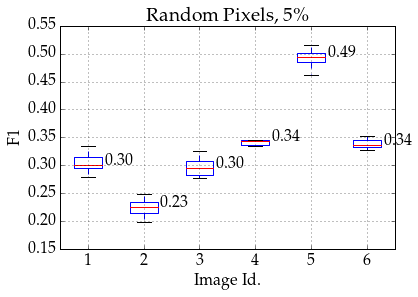

In [142]:
show_box_plot("Random Pixels, 5$\%$", "F1", f1_matrix)

In [148]:
f1_matrix[:,4]

array([ 0.48582618,  0.49206211,  0.47128464,  0.46253854,  0.49556023,
        0.50187523,  0.51502766,  0.48381305,  0.49625886,  0.50199661])

In [149]:
prec_matrix[:,4]

array([ 0.34316253,  0.37282133,  0.32242226,  0.32359638,  0.39122465,
        0.41886476,  0.37657677,  0.34068956,  0.35541359,  0.40054038])

In [126]:
f1_median = np.median(f1_matrix, axis=0)

In [152]:
f1_median.mean()

0.33238153623195915

In [128]:
np.save(output_dir + "random_pix_val_f1_median.npy", f1_median)

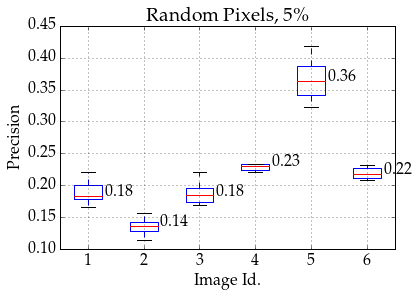

In [143]:
show_box_plot("Random Pixels, 5$\%$", "Precision", prec_matrix)

In [150]:
prec_matrix[:,4]

array([ 0.34316253,  0.37282133,  0.32242226,  0.32359638,  0.39122465,
        0.41886476,  0.37657677,  0.34068956,  0.35541359,  0.40054038])

In [151]:
f1_matrix[:,4]

array([ 0.48582618,  0.49206211,  0.47128464,  0.46253854,  0.49556023,
        0.50187523,  0.51502766,  0.48381305,  0.49625886,  0.50199661])

In [130]:
prec_median = np.median(prec_matrix, axis=0)

In [131]:
prec_median

array([ 0.1834262 ,  0.13576688,  0.18411767,  0.23092781,  0.36411746,
        0.21738169])

In [ ]:
prec_matrix

In [132]:
np.save(output_dir + "random_pix_val_prec_median.npy", prec_median)

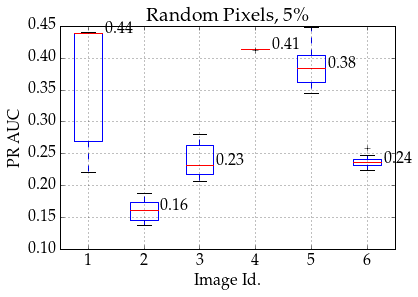

In [144]:
show_box_plot("Random Pixels, 5$\%$", "PR AUC", prec_rec_matrix)

In [140]:
pr_median= np.median(prec_rec_matrix, axis=0)

In [141]:
np.save(output_dir + "random_pix_val_pr_median.npy", pr_median)

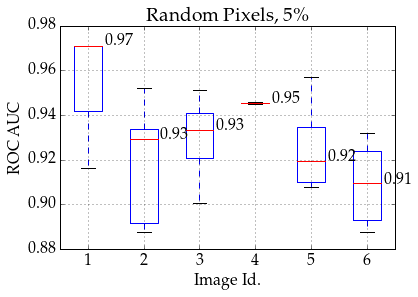

In [145]:
show_box_plot("Random Pixels, 5$\%$", "ROC AUC", roc_p_matrix)

In [136]:
roc_median = np.median(roc_p_matrix, axis=0)

In [137]:
roc_median

array([ 0.97094527,  0.92939155,  0.9334135 ,  0.9453537 ,  0.91938827,
        0.90942725])

In [139]:
np.save(output_dir + "random_pix_val_roc_median.npy", roc_median)